In [44]:
pip install pyjanitor plotly > /dev/null 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/pty.py:95: DeprecationWarning:

This process (pid=45068) is multi-threaded, use of forkpty() may lead to deadlocks in the child.




[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip3.13 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install ipykernel > /dev/null 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/pty.py:95: DeprecationWarning:

This process (pid=45068) is multi-threaded, use of forkpty() may lead to deadlocks in the child.




[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip3.13 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install --upgrade pip > /dev/null 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/pty.py:95: DeprecationWarning:

This process (pid=45068) is multi-threaded, use of forkpty() may lead to deadlocks in the child.



Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import janitor

df = pd.read_csv('worldbank-country-internet-data.csv')

df


,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Afghanistan,AFG,Individuals using the Internet (% of population),IT.NET.USER.ZS,..,..,..,..,..,..,...,7,8.26,11,13.5,16.8,17.6,18.4,..,..,..
1,Afghanistan,AFG,"Individuals using the Internet, female (% of f...",IT.NET.USER.FE.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,Afghanistan,AFG,"Individuals using the Internet, male (% of mal...",IT.NET.USER.MA.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,Afghanistan,AFG,Secure Internet servers,IT.NET.SECR,..,..,..,..,..,..,...,57,74,426,1577,1965,1047,1362,1565,1491,1814
4,Afghanistan,AFG,Secure Internet servers (per 1 million people),IT.NET.SECR.P6,..,..,..,..,..,..,...,1.7382011137112,2.18729357416894,12.2764405423167,44.1873650754779,53.4795175761047,27.6573503133086,34.861417801576,39.1245970166507,36.7432860701151,43.758544404586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1333,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
## cleaning the data up
## removing columns before 1990 as internet wasn't accesssible

df.columns = [col[0:4] if '[' in col else col for col in df.columns]
slected_columns = ['Country Name', 'Country Code', 'Series Name', 'Series Code']
selected_years = [str(year) for year in range (1990, 2024)]
#selected_countries = ['Greenland', 'Germany', 'Turkiye']

selected_countries = df['Country Name'].unique()

df = df[slected_columns + selected_years]
df

,Country Name,Country Code,Series Name,Series Code,1990,1991,1992,1993,1994,1995,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,Individuals using the Internet (% of population),IT.NET.USER.ZS,0,0,0,0,0,0,...,7,8.26,11,13.5,16.8,17.6,18.4,..,..,..
1,Afghanistan,AFG,"Individuals using the Internet, female (% of f...",IT.NET.USER.FE.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,Afghanistan,AFG,"Individuals using the Internet, male (% of mal...",IT.NET.USER.MA.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,Afghanistan,AFG,Secure Internet servers,IT.NET.SECR,..,..,..,..,..,..,...,57,74,426,1577,1965,1047,1362,1565,1491,1814
4,Afghanistan,AFG,Secure Internet servers (per 1 million people),IT.NET.SECR.P6,..,..,..,..,..,..,...,1.7382011137112,2.18729357416894,12.2764405423167,44.1873650754779,53.4795175761047,27.6573503133086,34.861417801576,39.1245970166507,36.7432860701151,43.758544404586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1333,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.to_csv('cleaned-wordbank.csv', index = False)

country_df = df[df['Country Name'].isin(selected_countries)]
cdf = country_df[country_df['Series Code'] == 'IT.NET.USER.ZS']
cdf

,Country Name,Country Code,Series Name,Series Code,1990,1991,1992,1993,1994,1995,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,Individuals using the Internet (% of population),IT.NET.USER.ZS,0,0,0,0,0,0,...,7,8.26,11,13.5,16.8,17.6,18.4,..,..,..
5,Albania,ALB,Individuals using the Internet (% of population),IT.NET.USER.ZS,0,0,0,0,0,0.011168695,...,54.3,56.9,59.6,62.4,65.4,68.5504,72.2377,79.3237,82.6137,83.1356
10,Algeria,DZA,Individuals using the Internet (% of population),IT.NET.USER.ZS,0,0,0,0,0.000360674,0.001768954,...,29.5,38.2,42.9455,47.6911,49.0385,58.9776,60.6534,66.2356,71.2432,..
15,American Samoa,ASM,Individuals using the Internet (% of population),IT.NET.USER.ZS,0,0,0,0,0,0,...,..,..,..,..,..,..,..,..,..,..
20,Andorra,AND,Individuals using the Internet (% of population),IT.NET.USER.ZS,0,0,0,0,0,0,...,86.1,87.9,89.7,91.5675,..,90.7187,93.2056,93.8975,94.4855,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,Sub-Saharan Africa,SSF,Individuals using the Internet (% of population),IT.NET.USER.ZS,0,0.00103339006294407,0.00300605109319489,0.00872450649445177,0.0189115927178311,0.0516203035316193,...,13.2,15.5,17.4,19.7,22.2,25.3,28.6,31.4,33.6,36.7
1310,Sub-Saharan Africa (excluding high income),SSA,Individuals using the Internet (% of population),IT.NET.USER.ZS,0,0.00103353108232207,0.00300645429140844,0.00872565599783131,0.0189140474858541,0.0516269095580683,...,13.3930118854558,16.2260981066249,18.2033384880882,19.992086387793,22.7323983584918,24.5505017992891,28.3739076668205,31.1036889526801,34.2083412575151,..
1315,Sub-Saharan Africa (IDA & IBRD countries),TSS,Individuals using the Internet (% of population),IT.NET.USER.ZS,0,0.00103339006294407,0.00300605109319489,0.00872450649445177,0.0189115927178311,0.0516203035316193,...,13.2,15.5,17.4,19.7,22.2,25.3,28.6,31.4,33.6,36.7
1320,Upper middle income,UMC,Individuals using the Internet (% of population),IT.NET.USER.ZS,0,0.00072167983173195,0.0024545247459725,0.00675433111142752,0.0167228631538406,0.0428391740912015,...,44.3,47.9,51.4,54.7,59.5,64.6,70.3,73.9,76.6,80


In [29]:
cdf.drop(['Country Code','Series Name','Series Code'], axis=1, inplace = True)
cdf

/var/folders/8_/vymgqhsx4bs4jk73k02625140000gn/T/ipykernel_8010/2370649269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.drop(['Country Code','Series Name','Series Code'], axis=1, inplace = True)


,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,0,0,0,0,0,0,..,..,..,...,7,8.26,11,13.5,16.8,17.6,18.4,..,..,..
5,Albania,0,0,0,0,0,0.011168695,0.032196828,0.048593919,0.06502737,...,54.3,56.9,59.6,62.4,65.4,68.5504,72.2377,79.3237,82.6137,83.1356
10,Algeria,0,0,0,0,0.000360674,0.001768954,0.001738533,0.010268463,0.020238555,...,29.5,38.2,42.9455,47.6911,49.0385,58.9776,60.6534,66.2356,71.2432,..
15,American Samoa,0,0,0,0,0,0,..,..,..,...,..,..,..,..,..,..,..,..,..,..
20,Andorra,0,0,0,0,0,0,1.526601023,3.050175385,6.886209218,...,86.1,87.9,89.7,91.5675,..,90.7187,93.2056,93.8975,94.4855,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,Sub-Saharan Africa,0,0.00103339006294407,0.00300605109319489,0.00872450649445177,0.0189115927178311,0.0516203035316193,0.0723178856418828,0.135088535529205,0.244727114553212,...,13.2,15.5,17.4,19.7,22.2,25.3,28.6,31.4,33.6,36.7
1310,Sub-Saharan Africa (excluding high income),0,0.00103353108232207,0.00300645429140844,0.00872565599783131,0.0189140474858541,0.0516269095580683,0.072239921157922,0.134945763092731,0.24444651395623,...,13.3930118854558,16.2260981066249,18.2033384880882,19.992086387793,22.7323983584918,24.5505017992891,28.3739076668205,31.1036889526801,34.2083412575151,..
1315,Sub-Saharan Africa (IDA & IBRD countries),0,0.00103339006294407,0.00300605109319489,0.00872450649445177,0.0189115927178311,0.0516203035316193,0.0723178856418828,0.135088535529205,0.244727114553212,...,13.2,15.5,17.4,19.7,22.2,25.3,28.6,31.4,33.6,36.7
1320,Upper middle income,0,0.00072167983173195,0.0024545247459725,0.00675433111142752,0.0167228631538406,0.0428391740912015,0.104659338866142,0.230229742929639,0.52532462618371,...,44.3,47.9,51.4,54.7,59.5,64.6,70.3,73.9,76.6,80


In [30]:
cdf.set_index('Country Name', inplace = True)
final_df = cdf.T


final_df

Country Name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Post-demographic dividend,Pre-demographic dividend,Small states,South Asia,South Asia (IDA & IBRD),Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Sub-Saharan Africa (IDA & IBRD countries),Upper middle income,World
1990,0,0,0,0,0,0,0,0,0,0,...,0.268184008278379,0,0,0,0,0,0,0,0,0.0488246930836708
1991,0,0,0,0,0,0,0,0,0,0,...,0.433871053269367,0,0.00999909663170826,0,0,0.00103339006294407,0.00103353108232207,0.00103339006294407,0.00072167983173195,0.078810516480602
1992,0,0,0,0,0,0,0,0.002992874,0,0,...,0.686176732116044,0,0.0405323878504144,8.47207838687609E-05,8.47207838687609E-05,0.00300605109319489,0.00300645429140844,0.00300605109319489,0.0024545247459725,0.125186329068216
1993,0,0,0,0,0,0,0,0.029527065,0,0,...,0.974165326848734,0,0.0902172330765852,0.000165773394396934,0.000165773394396934,0.00872450649445177,0.00872565599783131,0.00872450649445177,0.00675433111142752,0.179006679561227
1994,0,0,0.000360674,0,0,0,0,0.043705951,0.009117014,0,...,1.96528213048917,0.000126136358029008,0.268474006967189,0.000851278280873439,0.000851278280873439,0.0189115927178311,0.0189140474858541,0.0189115927178311,0.0167228631538406,0.360508148999431
1995,0,0.011168695,0.001768954,0,0,0,2.200768802,0.086277081,0.052743123,0,...,3.70828409584275,0.000377490072541013,0.633840126836151,0.0199772666301139,0.0199772666301139,0.0516203035316193,0.0516269095580683,0.0516203035316193,0.0428391740912015,0.6830820605321
1996,..,0.032196828,0.001738533,..,1.526601023,0.000775929,2.858449577,0.141954704,0.094572902,2.768382663,...,6.80185780427062,0.00487431196990747,1.23722146784725,0.0405637481805442,0.0405637481805442,0.0723178856418828,0.072239921157922,0.0723178856418828,0.104659338866142,1.32656715777098
1997,..,0.048593919,0.010268463,..,3.050175385,0.005673746,3.480536838,0.280339882,0.111650935,..,...,10.6511348518541,0.0140708305362041,2.17147711973206,0.0600382436706591,0.0600382436706591,0.135088535529205,0.134945763092731,0.135088535529205,0.230229742929639,2.04269705765004
1998,..,0.06502737,0.020238555,..,6.886209218,0.018453724,4.0717165,0.83076668,0.128659478,..,...,15.8764996502362,0.0288824112538799,3.72754620573422,0.116990401523534,0.116990401523534,0.244727114553212,0.24444651395623,0.244727114553212,0.52532462618371,3.14057959772322
1999,..,0.081437045,0.199523843,..,7.635686143,0.071964087,5.300681138,3.284481956,0.970737757,4.506179098,...,22.8970916477078,0.07413610007805,4.83403494637923,0.226072840294976,0.226072840294976,0.373976532861205,0.373264209407416,0.373976532861205,1.15132696328952,4.63290278425647


In [36]:

final_df['year'] = final_df.index.astype(int)

#final_df['Germany'] = pd.to_numeric(final_df['Germany'], errors='coerce').astype(float)
#final_df['Greenland'] = pd.to_numeric(final_df['Greenland'], errors='coerce').astype(float)
#final_df['Turkiye'] = pd.to_numeric(final_df['Turkiye'], errors='coerce').astype(float)


final_df = final_df.apply(pd.to_numeric, errors='coerce')

final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 1990 to 2023
Columns: 267 entries, Afghanistan to year
dtypes: float64(266), int64(1)
memory usage: 71.2+ KB


In [41]:
final_df.tail(10)

Country Name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Pre-demographic dividend,Small states,South Asia,South Asia (IDA & IBRD),Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Sub-Saharan Africa (IDA & IBRD countries),Upper middle income,World,year
2014,7.00,54.3000,29.5000,NaN,86.1000,21.3623,67.7800,64.7000,54.6228,83.7800,...,10.878462,46.5,12.820937,12.820937,13.2,13.393012,13.2,44.3,37.5,2014
2015,8.26,56.9000,38.2000,NaN,87.9000,22.0000,70.0000,68.0431,59.1008,88.6612,...,13.163011,49.8,14.190135,14.190135,15.5,16.226098,15.5,47.9,39.9,2015
2016,11.00,59.6000,42.9455,NaN,89.7000,23.2000,73.0000,70.9690,64.3460,93.5425,...,15.419049,53.3,16.192962,16.192962,17.4,18.203338,17.4,51.4,42.9,2016
2017,13.50,62.4000,47.6911,NaN,91.5675,26.0000,76.2000,74.2949,64.7449,97.1700,...,18.336491,58.5,18.065241,18.065241,19.7,19.992086,19.7,54.7,45.4,2017
2018,16.80,65.4000,49.0385,NaN,NaN,29.0000,79.6000,77.7000,68.2451,NaN,...,20.217246,61.2,20.182986,20.182986,22.2,22.732398,22.2,59.5,48.6,2018
2019,17.60,68.5504,58.9776,NaN,90.7187,32.1294,83.2000,79.9470,66.5439,NaN,...,23.024227,66.2,27.966527,27.966527,25.3,24.550502,25.3,64.6,53.2,2019
2020,18.40,72.2377,60.6534,NaN,93.2056,36.6347,86.8837,85.5144,76.5077,NaN,...,26.418833,70.7,39.060643,39.060643,28.6,28.373908,28.6,70.3,59.3,2020
2021,NaN,79.3237,66.2356,NaN,93.8975,37.8067,87.0740,87.1507,78.6123,NaN,...,30.019670,73.5,42.850648,42.850648,31.4,31.103689,31.4,73.9,62.2,2021
2022,NaN,82.6137,71.2432,NaN,94.4855,39.2935,91.4123,88.3754,77.0277,NaN,...,33.920013,75.1,NaN,NaN,33.6,34.208341,33.6,76.6,64.4,2022
2023,NaN,83.1356,NaN,NaN,NaN,NaN,NaN,89.2290,NaN,NaN,...,NaN,77.7,NaN,NaN,36.7,NaN,36.7,80.0,67.4,2023


In [42]:
idf = final_df.copy()
idf.index = idf.index.astype(int)

In [64]:
### interpolate not working properly

idf = idf.astype(float).interpolate(method = 'quadratic', order = 1)
idf.tail(10)

Country Name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Pre-demographic dividend,Small states,South Asia,South Asia (IDA & IBRD),Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Sub-Saharan Africa (IDA & IBRD countries),Upper middle income,World,year
2014,7.00,54.3000,29.5000,0.0,86.1000,21.3623,67.7800,64.7000,54.6228,83.7800,...,10.878462,46.5,12.820937,12.820937,13.2,13.393012,13.2,44.3,37.5,2014.0
2015,8.26,56.9000,38.2000,0.0,87.9000,22.0000,70.0000,68.0431,59.1008,88.6612,...,13.163011,49.8,14.190135,14.190135,15.5,16.226098,15.5,47.9,39.9,2015.0
2016,11.00,59.6000,42.9455,0.0,89.7000,23.2000,73.0000,70.9690,64.3460,93.5425,...,15.419049,53.3,16.192962,16.192962,17.4,18.203338,17.4,51.4,42.9,2016.0
2017,13.50,62.4000,47.6911,0.0,91.5675,26.0000,76.2000,74.2949,64.7449,97.1700,...,18.336491,58.5,18.065241,18.065241,19.7,19.992086,19.7,54.7,45.4,2017.0
2018,16.80,65.4000,49.0385,0.0,91.1431,29.0000,79.6000,77.7000,68.2451,97.1700,...,20.217246,61.2,20.182986,20.182986,22.2,22.732398,22.2,59.5,48.6,2018.0
2019,17.60,68.5504,58.9776,0.0,90.7187,32.1294,83.2000,79.9470,66.5439,97.1700,...,23.024227,66.2,27.966527,27.966527,25.3,24.550502,25.3,64.6,53.2,2019.0
2020,18.40,72.2377,60.6534,0.0,93.2056,36.6347,86.8837,85.5144,76.5077,97.1700,...,26.418833,70.7,39.060643,39.060643,28.6,28.373908,28.6,70.3,59.3,2020.0
2021,18.40,79.3237,66.2356,0.0,93.8975,37.8067,87.0740,87.1507,78.6123,97.1700,...,30.019670,73.5,42.850648,42.850648,31.4,31.103689,31.4,73.9,62.2,2021.0
2022,18.40,82.6137,71.2432,0.0,94.4855,39.2935,91.4123,88.3754,77.0277,97.1700,...,33.920013,75.1,42.850648,42.850648,33.6,34.208341,33.6,76.6,64.4,2022.0
2023,18.40,83.1356,71.2432,0.0,94.4855,39.2935,91.4123,89.2290,77.0277,97.1700,...,33.920013,77.7,42.850648,42.850648,36.7,34.208341,36.7,80.0,67.4,2023.0


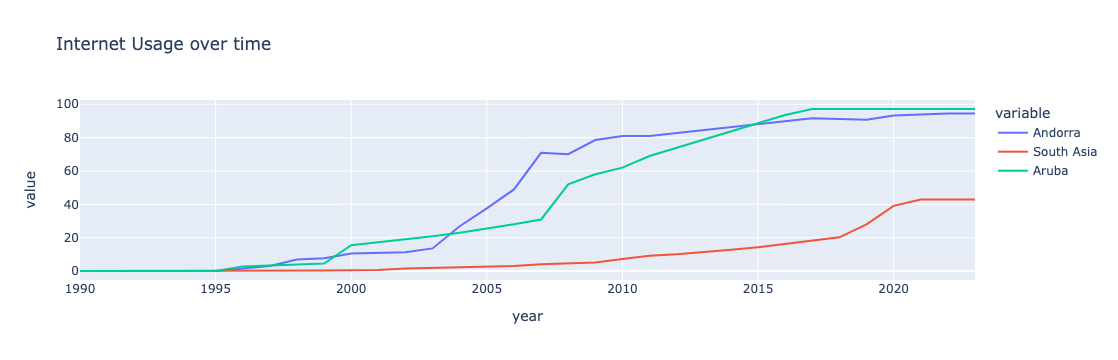

In [65]:
import matplotlib.pyplot as plt
import plotly.express as px

some_countries = ['Andorra', 'South Asia', 'Aruba']

#plt.plot(final_df.index, final_df['Greenland'])
px.line(idf, x = 'year', y = some_countries, title = 'Internet Usage over time')


### if needed to have more investigative part this can be done
